In [1]:
import Prims
import Kruskal
import Visualise
import random
import time

Kruskal's Algorithm MST
0-1 	2
1-2 	3
1-4 	5
0-3 	6
Adjacency matrix for the original graph:
[0, 2, 0, 6, 0]
[2, 0, 3, 8, 5]
[0, 3, 0, 0, 7]
[6, 8, 0, 0, 9]
[0, 5, 7, 9, 0]
Adjacency lists for the original graph:
Vertex 0: 1, 3
Vertex 1: 0, 2, 3, 4
Vertex 2: 1, 4
Vertex 3: 0, 1, 4
Vertex 4: 1, 2, 3
Total weight of MST: 16


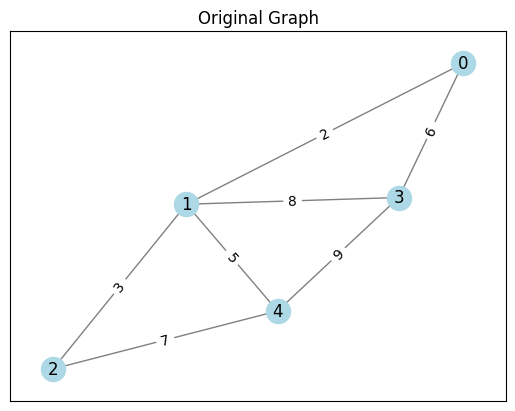

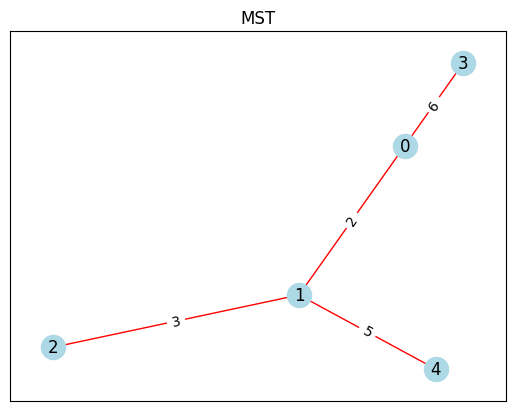

<Figure size 640x480 with 0 Axes>

In [2]:
def example_usage():
    #Adjuscency Matrix
    graph = [
        [0, 2, 0, 6, 0],
        [2, 0, 3, 8, 5],
        [0, 3, 0, 0, 7],
        [6, 8, 0, 0, 9],
        [0, 5, 7, 9, 0]
    ]

    #Get results
    result, mst_weight = Kruskal.kruskal_mst(graph)
    Kruskal.output(result, mst_weight, graph)

    #Visualise the graph
    G_original, G_mst = Visualise.create_graph(result, graph)
    Visualise.draw_graph(G_original, G_mst)

# Example usage
example_usage()

In [3]:
def get_density(V, E):
    # Density of a graph
    density = 2*E/(V*(V-1)) #Unit: No. E/ No. nodes
    return density

# 3 cases for generating graph
def generate_negative_weighted_graph(num_vertices):
    graph = [[float('inf')] * num_vertices for _ in range(num_vertices)]
    for u in range(num_vertices):
        for v in range(u + 1, num_vertices):
            weight = random.randint(-10,10)
            graph[u][v] = weight
            graph[v][u] = weight
    return graph

def generate_sparse_graph(density, num_vertices, num_edges):
    graph = [[0] * num_vertices for _ in range(num_vertices)]
    for u in range(num_vertices):
        for v in range(u + 1, num_vertices):
            if num_edges > 0:
                weight = random.randint(1, 10)
                graph[u][v] = weight
                graph[v][u] = weight
                num_edges -= 1
    return graph

def generate_dense_graph(density, num_vertices, num_edges):
    graph = [[0] * num_vertices for _ in range(num_vertices)]
    for u in range(num_vertices):
        for v in range(u + 1, num_vertices):
            if num_edges > 0:
                weight = random.randint(1, 10)
                graph[u][v] = weight
                graph[v][u] = weight
                num_edges -= 1
    return graph

Time taken from Kruskal: 0.06036019325256348


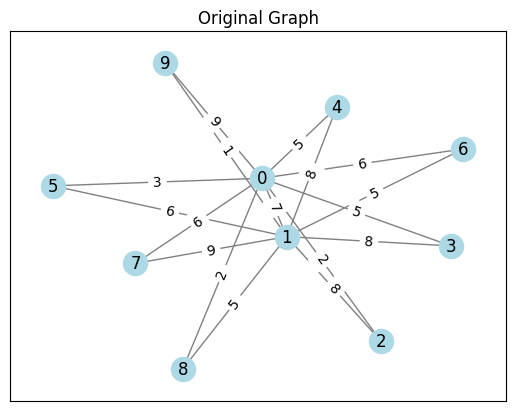

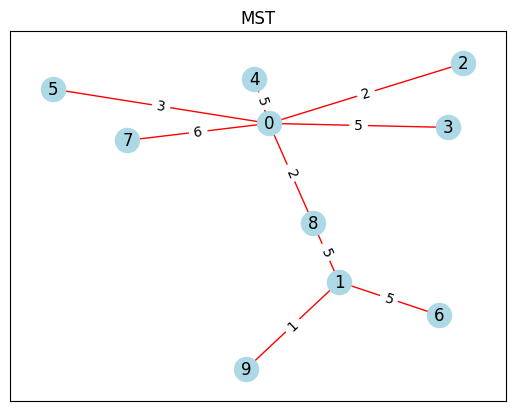

<Figure size 640x480 with 0 Axes>

In [8]:
# Case 1: Sparse Graph
num_vertices = 10  # Input
num_edges = 17 #Input (density = 0.3778)
density = get_density(num_vertices, num_edges)

if density < 0.5:
    graph = generate_sparse_graph(density, num_vertices, num_edges)
else:
    graph = generate_dense_graph(density, num_vertices, num_edges)

start = time.time()
result, mst_weight = Kruskal.kruskal_mst(graph)
# Kruskal.output(result, mst_weight, graph)
G_original, G_mst = Visualise.create_graph(result, graph)
Visualise.draw_graph(G_original, G_mst)
end = time.time()
print("Time taken from Kruskal:", end - start)

Time taken from Prims: 0.07963848114013672


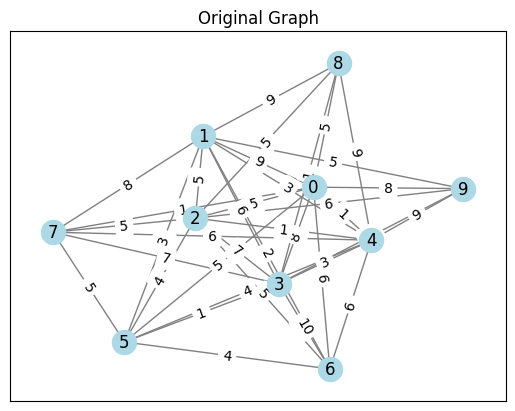

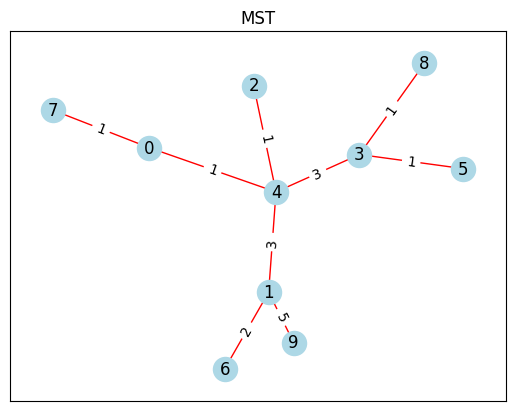

<Figure size 640x480 with 0 Axes>

In [12]:
# Case 2: Dense Graph
num_vertices = 10  # Input
num_edges = 37 #Input (density = 0.8222)
density = get_density(num_vertices, num_edges)

if density < 0.5:
    graph = generate_sparse_graph(density, num_vertices, num_edges)
else:
    graph = generate_dense_graph(density, num_vertices, num_edges)

start = time.time()
result, mst_weight = Prims.prim_mst(graph)
#Prims.output(result, mst_weight, graph)
G_original, G_mst = Visualise.create_graph(result, graph)
Visualise.draw_graph(G_original, G_mst)
end = time.time()
print("Time taken from Prims:", end - start)

Time taken from Prims: 0.05229067802429199


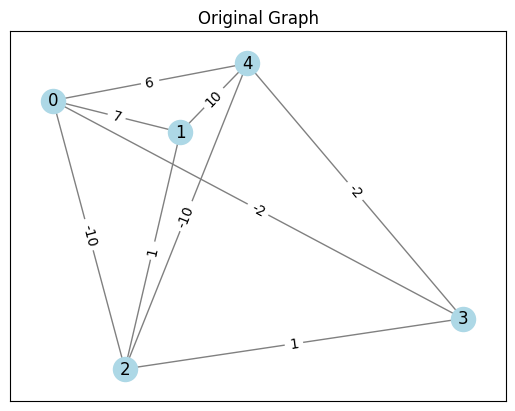

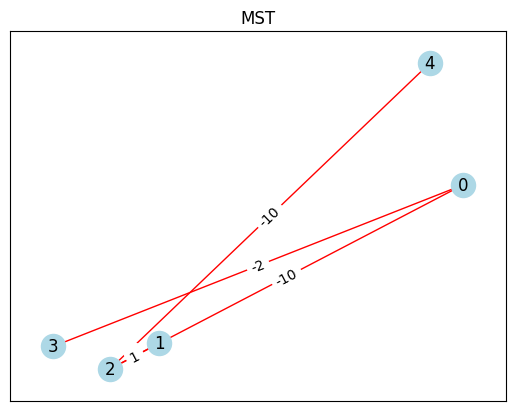

<Figure size 640x480 with 0 Axes>

In [11]:
# Case 3: Negative-weighted Graph
negative_graph = generate_negative_weighted_graph(num_vertices=5)
start = time.time()
result, mst_weight = Prims.prim_mst(negative_graph)
# Prims.output(result, mst_weight, graph)
G_original, G_mst = Visualise.create_graph(result, negative_graph)
Visualise.draw_graph(G_original, G_mst)
end = time.time()
print("Time taken from Prims:", end - start)